### Linear Regression Analysis

#### 1. Domain-specific area and objectives

In my local area, Toronto, the problem everyone is dealing with is the rising cost of housing. Both renters and people looking to buy a home are struggling because of increasing mortgage rates and inflation. This issue also affects those who rent, as landlords need more money to cover their expenses.

Many people believe that the housing prices will not go down but will keep going up, making it even more challenging for everyone. I want to explore how another country, like the United States, is managing housing prices in their cities.

The project's main focus is on predicting prices, using simple linear regression techniques. By comparing how housing prices are changing in US city, especially in urban area like California, I hope to understand if there are similar trends or differences. This information can help us see the bigger picture and better understand what's happening with housing prices globally.

#### 2. Dataset Description

I will be using California housing prices dataset from sklearn website. We will analyze this dataset that goes back to 1990, and we will perform linear Regression on it with different factors as stated in columns in dataset. As the dataset describes in columns, there are a lot of factors that we need to consider when it comes to buying a house, such as "If it's near bay yet rather cheaper than other near bay houses" or "If it's more expensive and not near bay, then what are the factors that makes it more expensive?  does it have more rooms, bedrooms? etc". As we desired from #1 the data set would give us enough overview of housing price prediction in urban US city.


#### 3. Data preparation

##### Data acquisition

In [1]:
import pandas as pd
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
print(df.describe())
df.info()

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

We can see that total_bedrooms data is missing about 200 data.

In [4]:
# dropping data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


As result of dropping we can see that number of rows changed

##### Train Test split

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13271,-117.65,34.09,33.0,2446.0,396.0,1209.0,412.0,4.3958,INLAND,145600.0
7831,-118.15,33.90,20.0,2850.0,737.0,1855.0,662.0,2.8090,<1H OCEAN,144600.0
11463,-117.99,33.67,12.0,2228.0,479.0,1122.0,488.0,4.0385,<1H OCEAN,350000.0
10289,-117.83,33.88,18.0,2112.0,340.0,1048.0,315.0,6.9308,<1H OCEAN,231700.0
10409,-117.59,33.66,4.0,1318.0,218.0,673.0,225.0,6.0722,<1H OCEAN,260800.0
...,...,...,...,...,...,...,...,...,...,...
12816,-121.50,38.63,6.0,693.0,143.0,276.0,151.0,3.1944,INLAND,117000.0
3609,-118.43,34.25,38.0,921.0,239.0,1023.0,241.0,3.4514,<1H OCEAN,151900.0
16956,-122.30,37.53,38.0,984.0,171.0,429.0,157.0,5.3261,NEAR OCEAN,376800.0
17216,-119.71,34.43,48.0,2408.0,536.0,1005.0,497.0,3.5213,<1H OCEAN,458600.0


##### Normalization of Data

All the columns have different scales of numerics, decided to normalize with min max scaler.

In [32]:
#comment out when running whole notebook except the numerical columns part since it will cause error when we do LR model
from sklearn.preprocessing import MinMaxScaler


numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',

                     'population', 'households', 'median_income']

scaler = MinMaxScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
print(X_train.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13271   0.667331  0.164718            0.627451     0.709787        0.654957   
7831    0.617530  0.144527            0.372549     0.725965        0.731709   
11463   0.633466  0.120085            0.215686     0.699908        0.678459   
10289   0.649402  0.142402            0.333333     0.694249        0.636134   
10409   0.673307  0.119022            0.058824     0.644357        0.581318   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
13271    0.627968    0.664617       0.540818      False    True   False   
7831     0.674999    0.723635       0.393701       True   False   False   
11463    0.619765    0.685679       0.511876       True   False   False   
10289    0.612271    0.631238       0.703514       True   False   False   
10409    0.563639    0.589442       0.655110       True   False   False   

       NEAR BAY  NEAR OCEAN  bedroom_ratio  household_rooms  
13271     Fa

#### 4. Statistical analysis

Analyzing CT, Spread, DT with scipy and pandas.

In [8]:
from scipy.stats import skew

# For the training set
train_key_data = X_train[numerical_columns]
train_central_tendency = train_key_data.mean()
train_spread = train_key_data.std()
train_distribution_type = train_key_data.apply(lambda x: 'Normal' if abs(skew(x)) < 0.5 else 'Skewed')
train_statistical_summary = pd.DataFrame({
    'Central Tendency (Mean)': train_central_tendency,
    'Spread (Standard Deviation)': train_spread,
    'Distribution Type': train_distribution_type
})
print("Training Set Statistical Summary:")
print(train_statistical_summary)

# For the testing set
test_key_data = X_test[numerical_columns]
test_central_tendency = test_key_data.mean()
test_spread = test_key_data.std()
test_distribution_type = test_key_data.apply(lambda x: 'Normal' if abs(skew(x)) < 0.5 else 'Skewed')
test_statistical_summary = pd.DataFrame({
    'Central Tendency (Mean)': test_central_tendency,
    'Spread (Standard Deviation)': test_spread,
    'Distribution Type': test_distribution_type
})
print("\nTesting Set Statistical Summary:")
print(test_statistical_summary)


Training Set Statistical Summary:
                    Central Tendency (Mean)  Spread (Standard Deviation)  \
longitude                       -119.574603                     2.002362   
latitude                          35.636196                     2.137678   
housing_median_age                28.611587                    12.612125   
total_rooms                     2634.926220                  2184.478001   
total_bedrooms                   538.081794                   422.428240   
population                      1426.364615                  1141.101540   
households                       499.640524                   383.521118   
median_income                      3.869975                     1.901608   

                   Distribution Type  
longitude                     Normal  
latitude                      Normal  
housing_median_age            Normal  
total_rooms                   Skewed  
total_bedrooms                Skewed  
population                    Skewed  
househol

Mean represents the average value of the data.
Standard deviation measures the amount of variation or dispersion in a set of values.
Skewness is a measure of the asymmetry of the distribution.

As per distribution other than longitude, latitude, housing_median_age, the rest have non uniform data

#### 5. Visualization

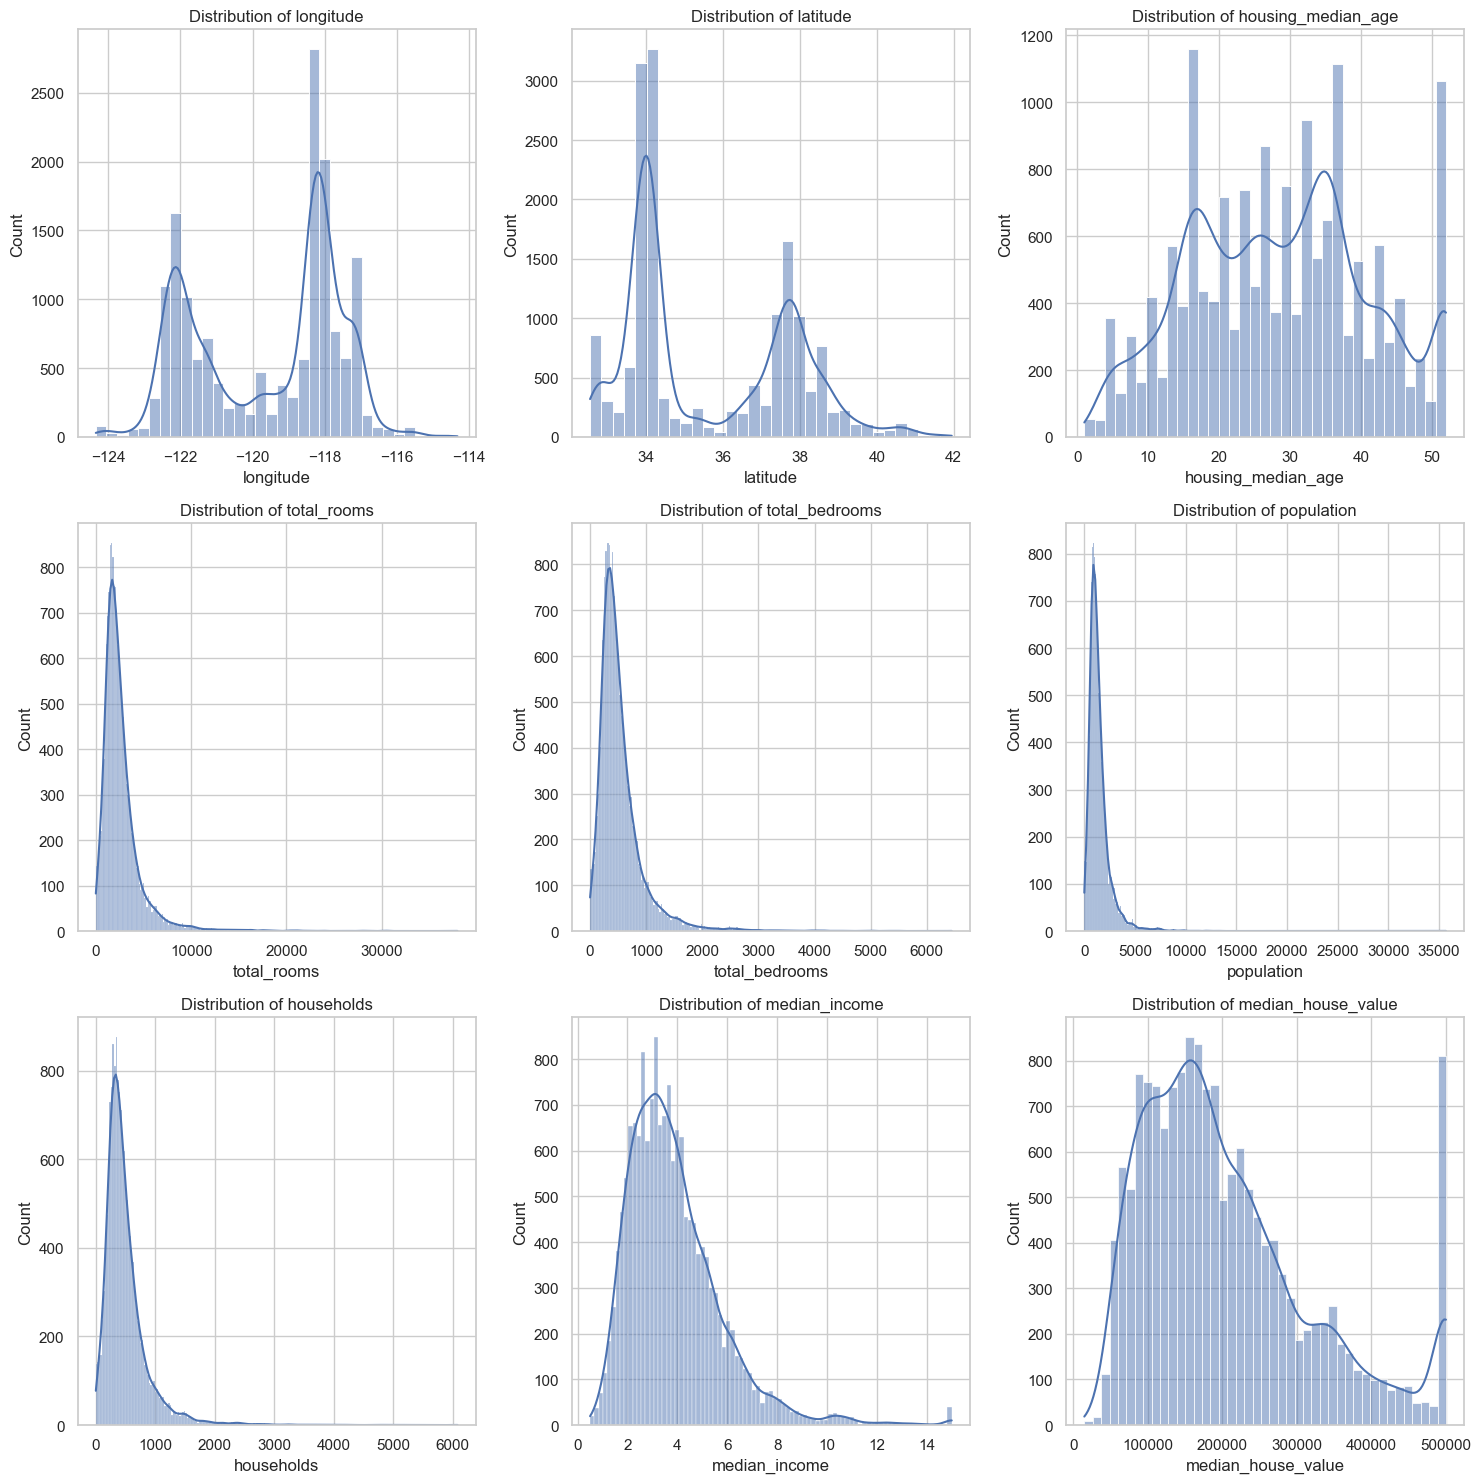

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

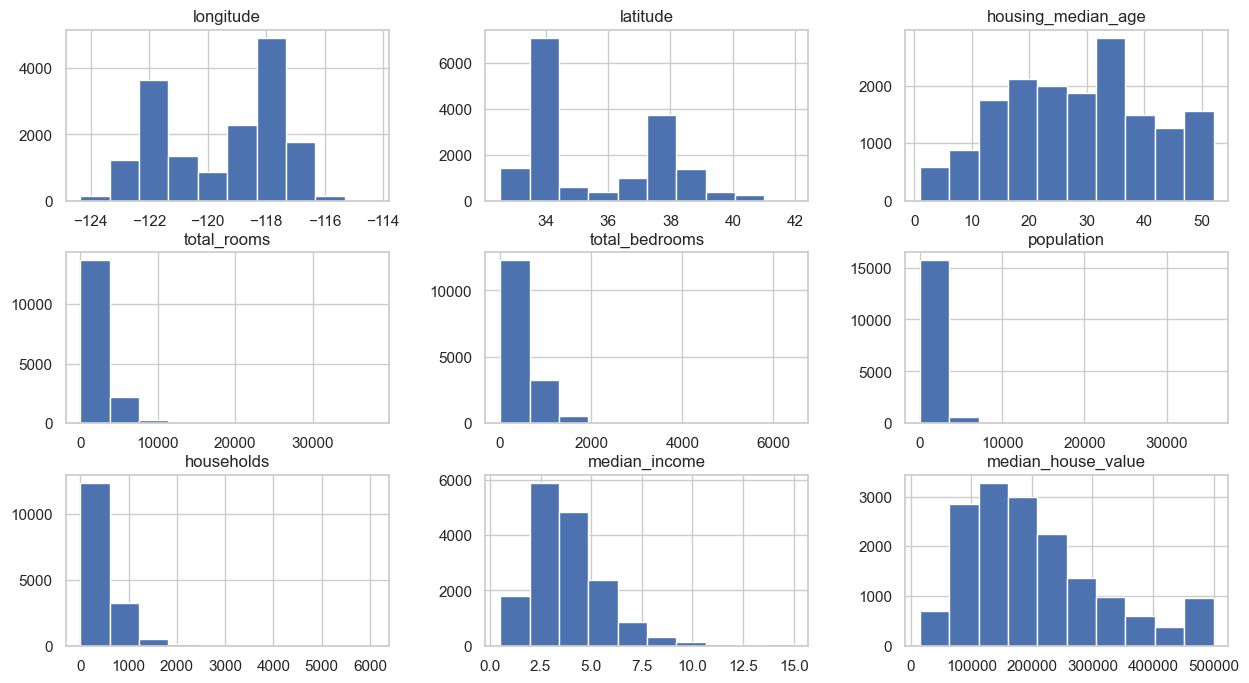

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                     'population', 'households', 'median_income', 'median_house_value']

# Plotting numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 3)
    sns.histplot(train_data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()
train_data.hist(figsize=(15, 8))

<Axes: >

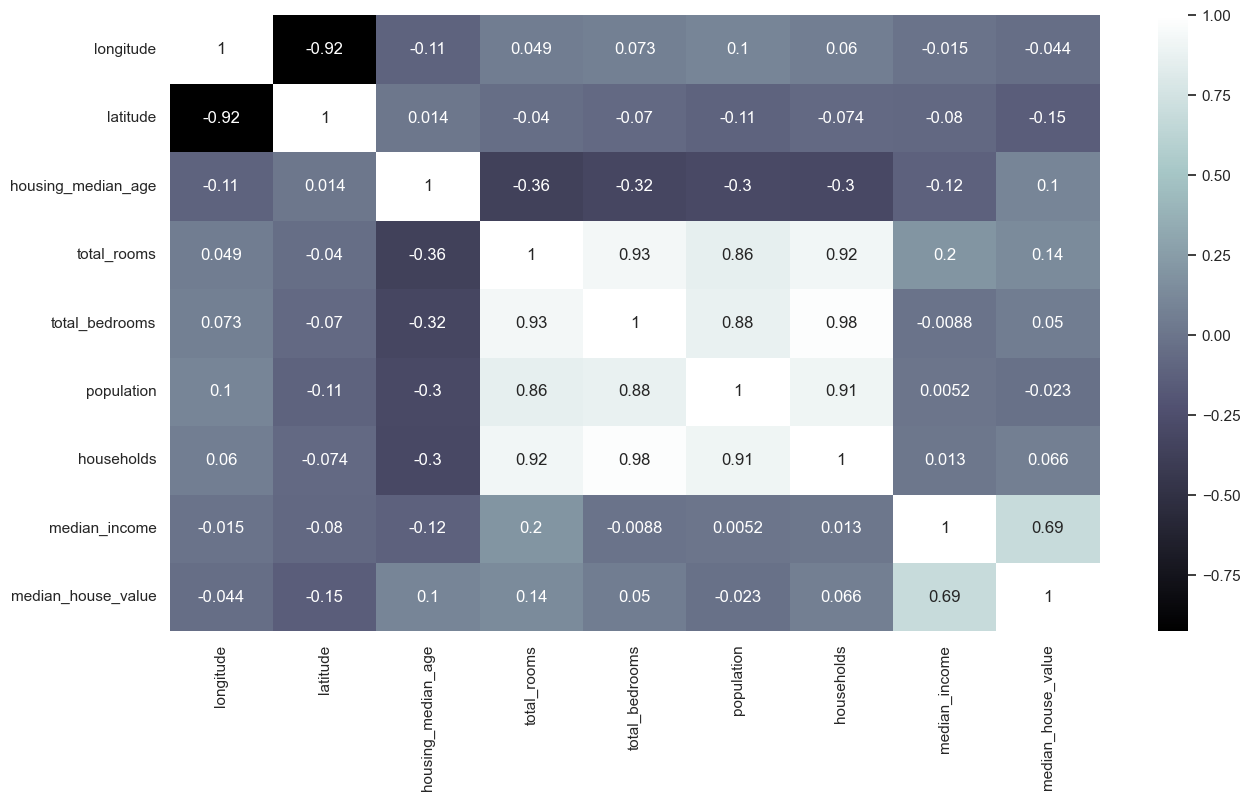

In [10]:
train_data = X_train.join(y_train).select_dtypes(include=['float64'])
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="bone")

In [11]:
train_data = X_train.join(y_train)

Handling Skewed Distributions and Logarithmic transformation with preventing original zero values making it undefined.

In [12]:
import numpy as np
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data['median_income'] = np.log(train_data['median_income'] + 1)

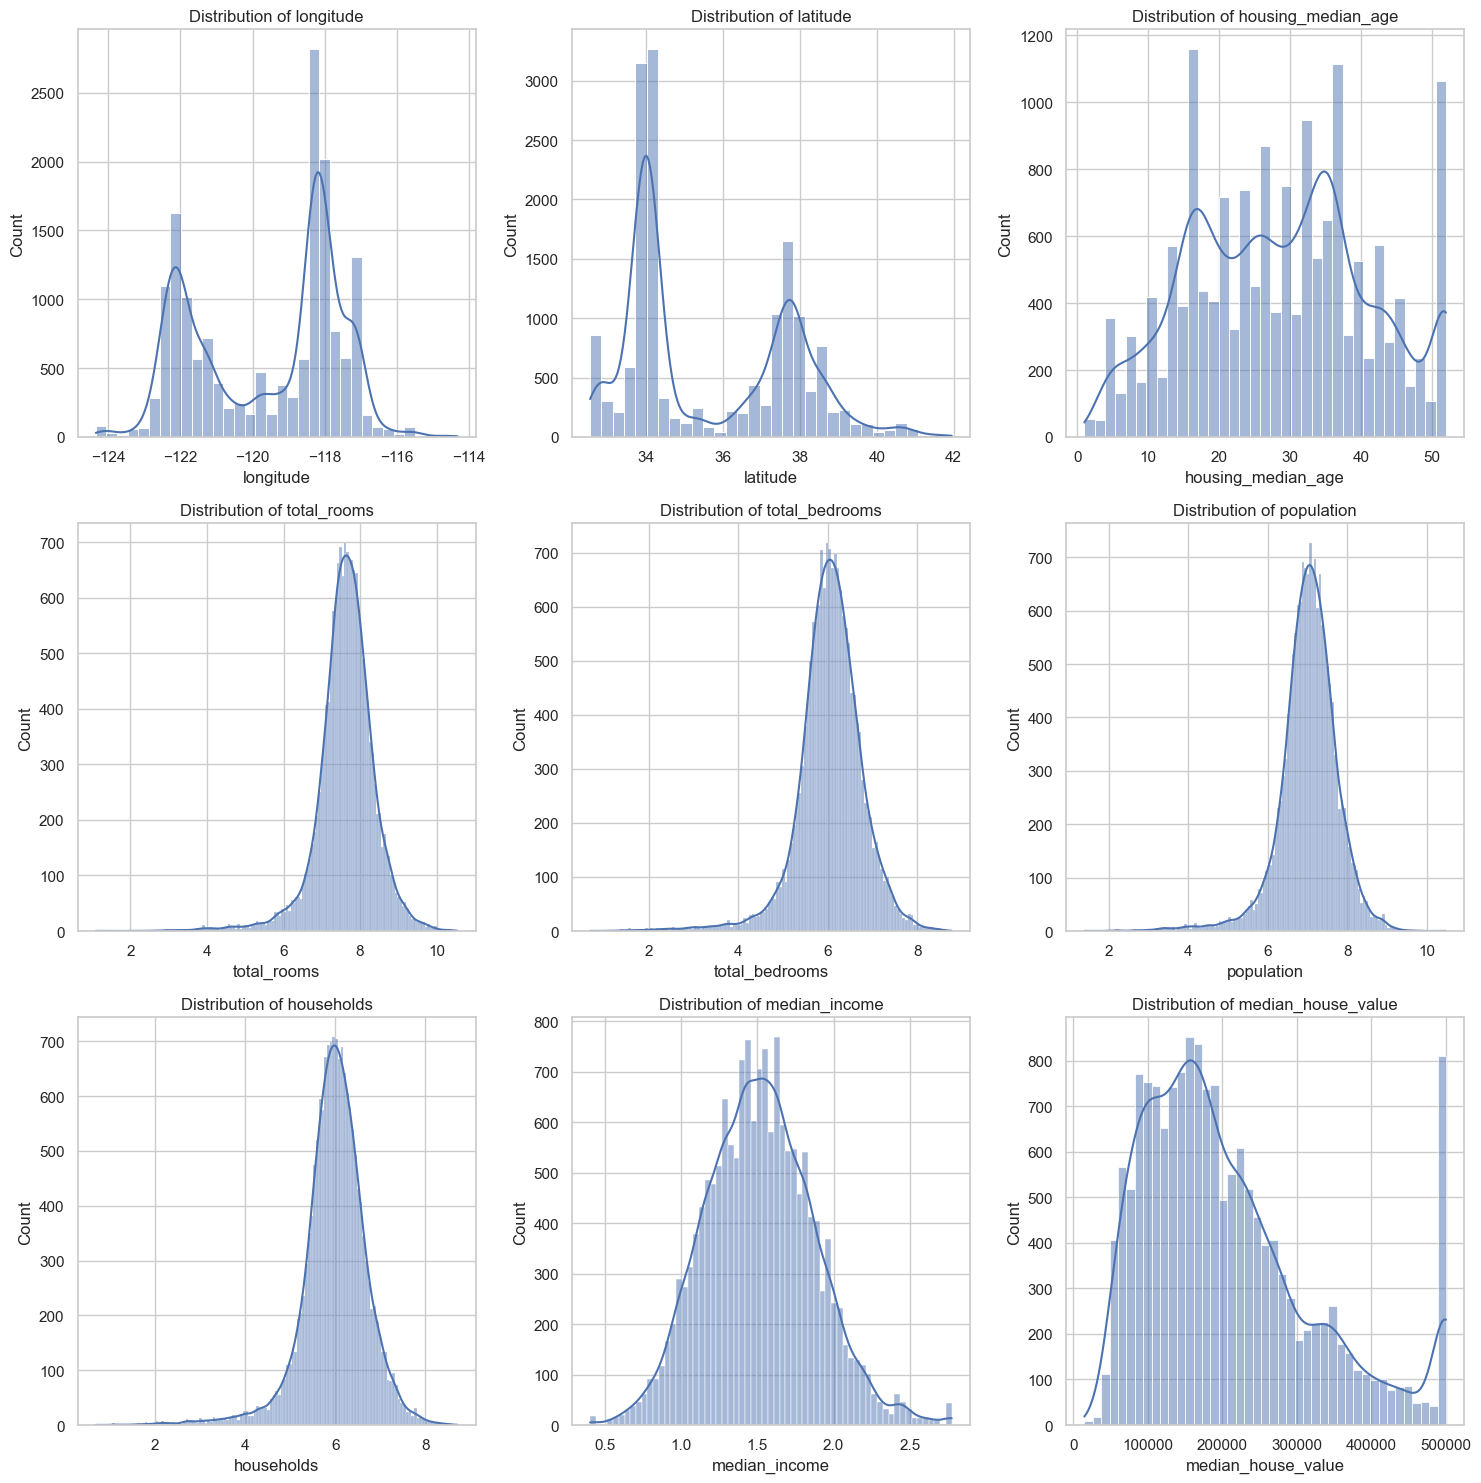

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

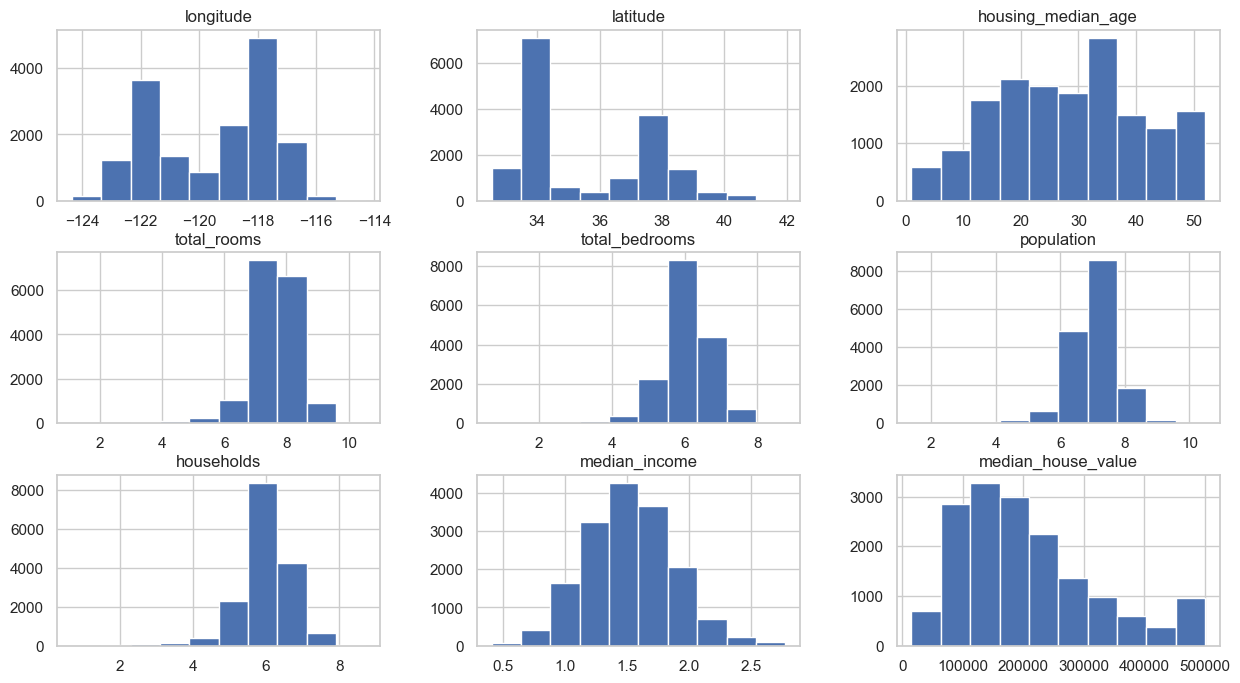

In [13]:
sns.set(style="whitegrid")
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                     'population', 'households', 'median_income', 'median_house_value']

# Plotting numerical features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 3)
    sns.histplot(train_data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()
train_data.hist(figsize=(15, 8))

Need to change "Ocean proximity", since we can assume that closer to ocean the price is higher

In [14]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

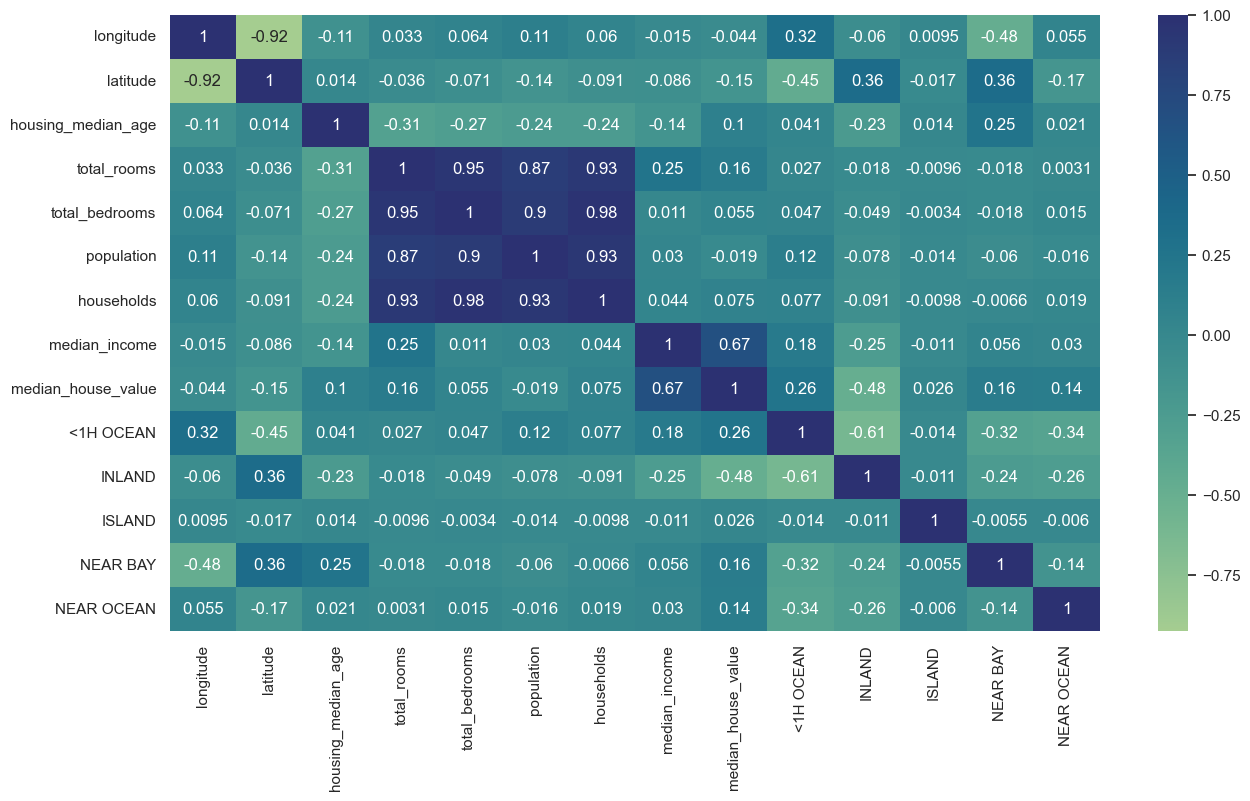

In [15]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="crest")

Features now added to heatmap and we can analyze things like INLAND is in negative value correlation with median house value which means that it has lower prices than other featured locations of houses. And as we can see that <1H OCEAN is 0.26 for median house value which has the highest value.

<Axes: xlabel='latitude', ylabel='longitude'>

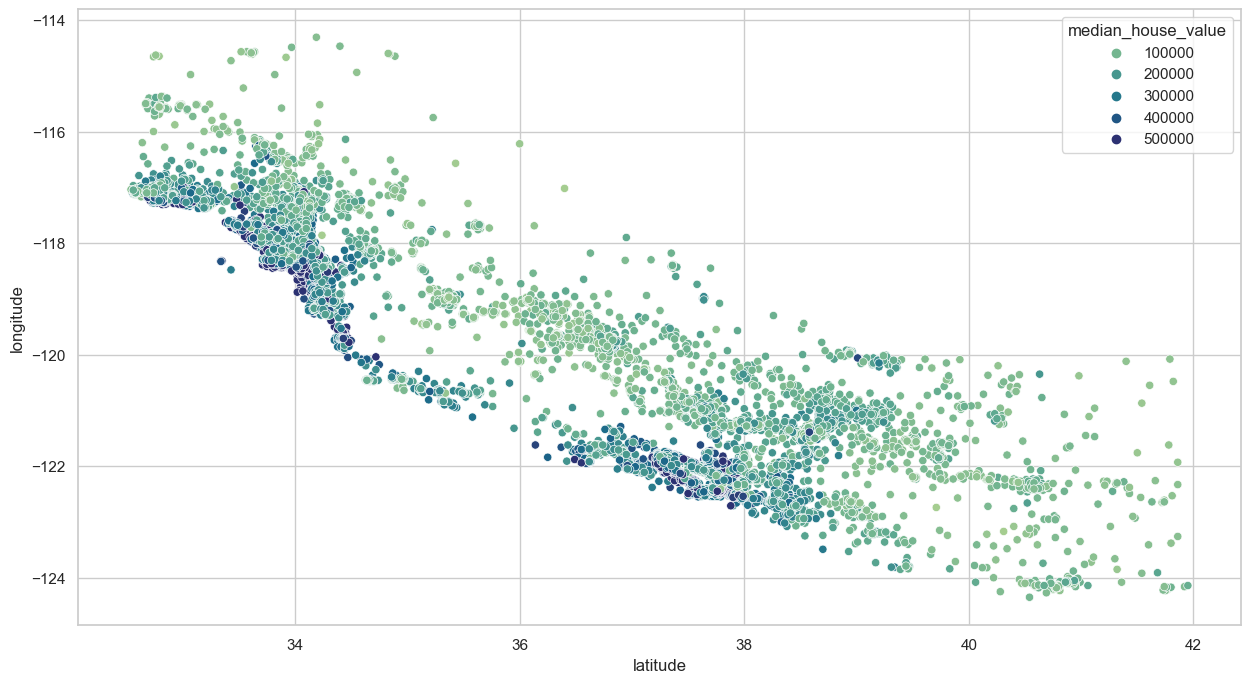

In [16]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y ="longitude", data = train_data, hue="median_house_value", palette="crest")

Closer to (0,0) for longitude and latitude would be closer to ocean and it shows as it has higher value for median_house_value

#### Feature Engineering

In [17]:
# feature engineering for bedroom and number of rooms
# making bedroom ratio out of number of rooms

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

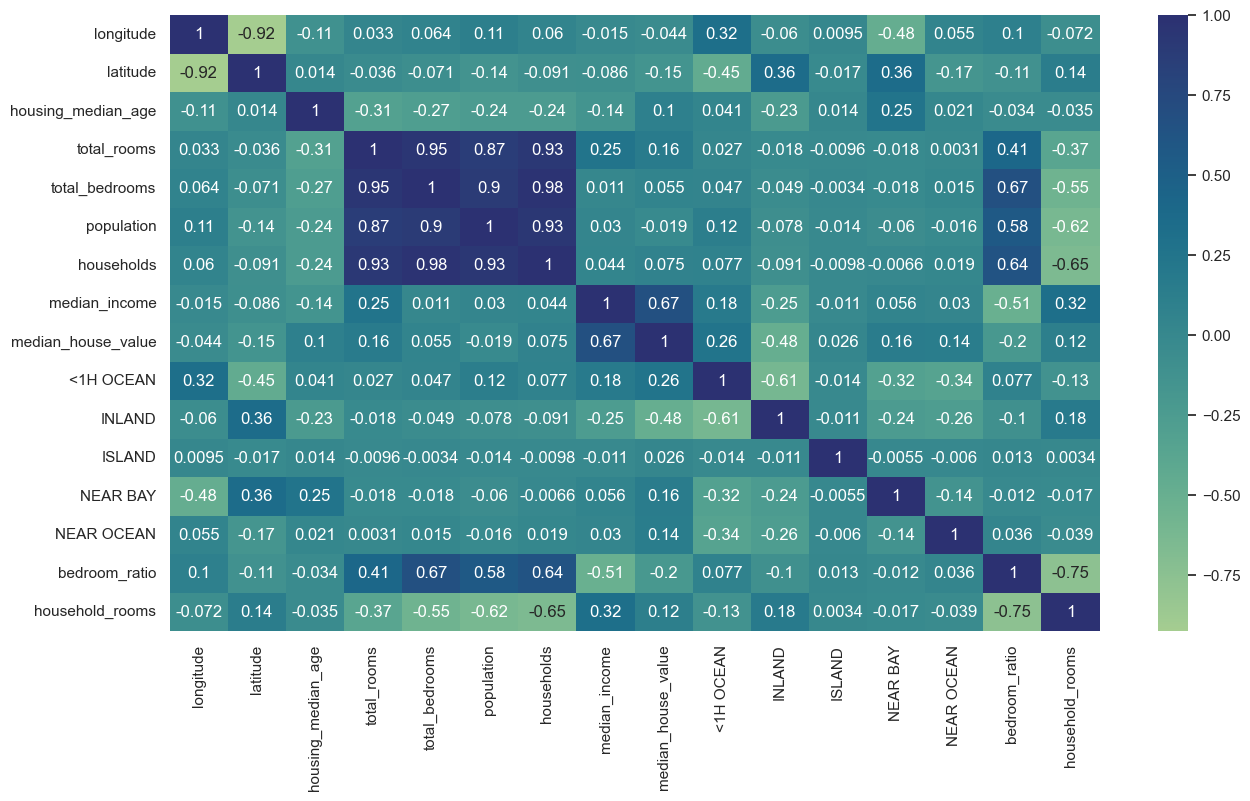

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="crest")

### 6. ML implementation with simple linear regression and Random forest model/ Grid search

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)


reg = LinearRegression()

reg.fit(X_train_s, y_train)


LinearRegression()

In [22]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+ 1)
test_data['population'] = np.log(test_data['population']+ 1)
test_data['households'] = np.log(test_data['households']+ 1)
test_data['median_income'] = np.log(test_data['median_income']+ 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']


In [23]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [24]:
X_test_s = scaler.transform(X_test)

In [26]:
reg.score(X_test_s, y_test)

0.6275321566404938

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [30]:
forest.score(X_test_s, y_test)

0.8092593914230334

In [31]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" :[100, 200, 300],
    "min_samples_split" : [2,4],
    "max_depth" : [None, 4, 8]
    
}

grid_search = GridSearchCV(forest, 
                           param_grid, 
                           cv=5, 
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
best_f = grid_search.best_estimator_
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200)

In [35]:
best_f.score(X_test_s, y_test)

0.8098074002114508

#### 10. Evaluation

In [39]:
from sklearn.metrics import mean_squared_error
predictions_reg = reg.predict(X_test_s)
predictions_forest = forest.predict(X_test_s)
predictions_best_f = best_f.predict(X_test_s)

# Calculate RMSE for Linear Regression
rmse_reg = np.sqrt(mean_squared_error(y_test, predictions_reg))

# Calculate RMSE for Random Forest
rmse_forest = np.sqrt(mean_squared_error(y_test, predictions_forest))

# Calculate RMSE for the Grid Search
rmse_best_f = np.sqrt(mean_squared_error(y_test, predictions_best_f))

print(f"RMSE (Linear Regression): {rmse_reg}")
print(f"RMSE (Random Forest): {rmse_forest}")
print(f"RMSE (GridCV Model): {rmse_best_f}")

RMSE (Linear Regression): 71601.08850351443
RMSE (Random Forest): 51556.81109291744
RMSE (GridCV Model): 51164.88943351354


The analysis of feature engineering has been pivotal, revealing richer insights into the dataset and validating our initial assumption that houses closer to the coast command higher prices. This deeper understanding adds layers to our grasp of housing dynamics. Our modeling journey encompasses Linear Regression, Random Forest, and Grid Search. Through thorough fitting and Root Mean Squared Error (RMSE) analysis, results highlight the Random Forest model's superior performance over Linear Regression. Notably, the Grid Search model, fine-tuned with an optimal n_estimator value of 200, surpasses the Random Forest in predictive prowess.

These comparative scores serve as tangible evidence supporting our feature engineering and modeling decisions. The Grid Search-tuned model, exhibiting subtle yet significant improvement over Random Forest, emphasizes the meticulous nature of hyperparameter tuning. The findings contribute valuable insights to housing price prediction in urban US cities, notably in California, unraveling the nuanced interplay of features influencing housing costs. The combination of thoughtful feature engineering and a robust model evaluation process has elevated the depth and accuracy of our predictive models, making them more applicable to real-world scenarios and decision-making in the housing market.